# 使用Pytorch 搭建神经网络进实现气温预测


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
features = pd.read_csv('temps.csv')
print(features.head())
print(features.shape)
features.describe()

       Date  Temperature(Celsius)(high)  Temperature(Celsius)(avg)  \
0  2014-1-1                          12                          4   
1  2014-1-2                           7                          0   
2  2014-1-3                           9                          3   
3  2014-1-4                           2                         -2   
4  2014-1-5                           7                          0   

   Temperature(Celsius)(low)  Dew Point(Celsius)(high)  \
0                         -2                       -12   
1                         -6                        -6   
2                         -2                        -7   
3                         -6                        -4   
4                         -7                        -5   

   Dew Point(Celsius)(avg)  Dew Point(Celsius)(low)  Humidity(%)(high)  \
0                      -17                      -20                 44   
1                       -9                      -13                 74   
2       

,Temperature(Celsius)(high),Temperature(Celsius)(avg),Temperature(Celsius)(low),Dew Point(Celsius)(high),Dew Point(Celsius)(avg),Dew Point(Celsius)(low),Humidity(%)(high),Humidity(%)(avg),Humidity(%)(low),Sea Level Press(hPa's)(high),Sea Level Press(hPa's)(avg),Sea Level Press(hPa's)(low),Visibility(km)(high),Visibility(km)(avg),Visibility(km)(low),Wind(km/h)(high),Wind(km/h)(avg),Precipitation(mm)(sum)
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,19.523288,13.364384,7.542466,6.580822,2.123288,-2.465753,78.630137,50.753425,23.753425,1019.536986,1016.657534,1013.934247,18.073973,9.504110,4.131507,21.961644,8.942466,1.112027
std,11.249060,10.937703,11.032742,12.328479,13.762452,15.056015,18.203299,19.083953,17.474142,10.026442,9.641969,9.512055,10.124907,6.458074,3.993019,10.709894,4.651536,5.510722
min,-2.000000,-7.000000,-13.000000,-24.000000,-33.000000,-40.000000,19.000000,8.000000,4.000000,1001.000000,996.000000,993.000000,2.000000,1.000000,0.000000,6.000000,3.000000,0.000000
25%,9.000000,3.000000,-3.000000,-4.000000,-9.000000,-14.000000,69.000000,37.000000,8.000000,1010.000000,1008.000000,1005.000000,8.000000,5.000000,2.000000,14.000000,6.000000,0.000000
50%,22.000000,14.000000,9.000000,9.000000,3.000000,-2.000000,83.000000,50.000000,20.000000,1019.000000,1016.000000,1014.000000,18.000000,7.000000,3.000000,18.000000,8.000000,0.000000
75%,30.000000,23.000000,18.000000,18.000000,15.000000,11.000000,94.000000,65.000000,36.000000,1028.000000,1025.000000,1022.000000,31.000000,13.000000,6.000000,26.000000,10.000000,0.000000
max,42.000000,31.000000,27.000000,25.000000,24.000000,23.000000,100.000000,93.000000,81.000000,1039.000000,1037.000000,1034.000000,31.000000,31.000000,31.000000,72.000000,34.000000,75.950000


In [ ]:
# 时间格式化
import datetime

years = features['year']
months = features['month']
days = features['day']

dates = [f'{year}-{month}-{day}' for year,month,day in zip(years,months,days)]
dates = [datetime.datetime.strptime(date,'%Y-%m-%d') for date in dates]


In [6]:
import datetime
dates = [datetime.datetime.strptime(date,'%Y-%m-%d') for date in features['Date']]
print(dates[:5])

[datetime.datetime(2014, 1, 1, 0, 0), datetime.datetime(2014, 1, 2, 0, 0), datetime.datetime(2014, 1, 3, 0, 0), datetime.datetime(2014, 1, 4, 0, 0), datetime.datetime(2014, 1, 5, 0, 0)]


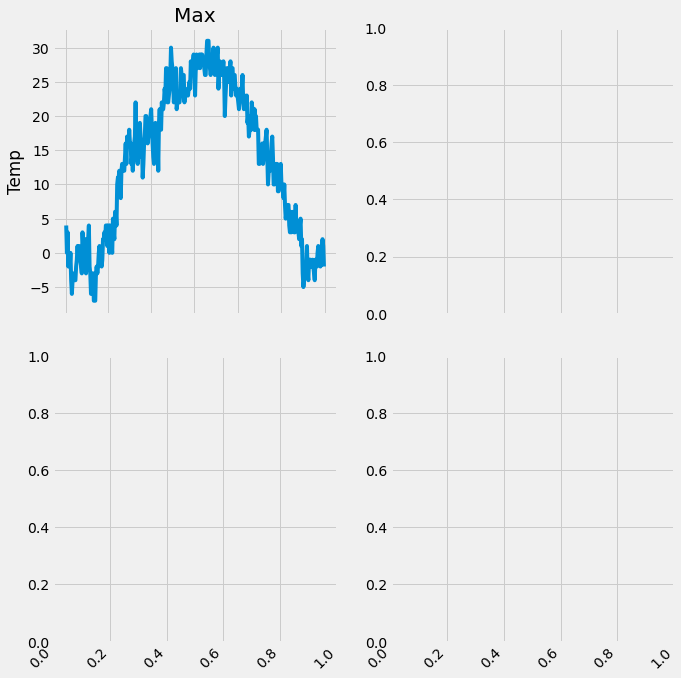

In [8]:
# 可视化
plt.style.use('fivethirtyeight')
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
fig.autofmt_xdate(rotation=45)

# 标签
ax1.plot(dates, features['Temperature(Celsius)(avg)'])
ax1.set_xlabel('')
ax1.set_ylabel('Temp'); ax1.set_title('Max')

plt.tight_layout(pad=2)

In [ ]:
# 独热编码
features = pd.get_dummies(features)  # 字符串值 列展开成行
print(features.head())


In [ ]:
labels = np.array(features['actual'])
features = features.drop('actual', axis=1)
feature_list = list(features.columns)
features = np.array(features)
print(features.shape) # 几个特征 ?


In [ ]:
# 使用 sklearn 预处理
from sklearn import  preprocessing
input_feature = preprocessing.StandardScaler().fit_transform(features)
print(input_feature[0])
# 标准化后更容易收敛

In [9]:
# 构建神经网络 一种麻烦的方法

x = torch.tensor(input_feature, dtype=float)
y = torch.tensor(labels, dtype=float)

# 权重
weights = torch.randn((14,128), dtype=float, requires_grad=True) # 随机初始化参数
biases = torch.randn(128, dtype=float, requires_grad=True)
weights2 = torch.randn((128,1), dtype=float, requires_grad=True)
biases2 = torch.randn(1, dtype=float, requires_grad=True)

lr = 0.001
losses = []
epochs = 1000
for epoch in range(epochs):
    hidden = x.mm(weights) +  biases # 矩阵
    hidden = torch.relu(hidden) # 激活函数
    pred = hidden.mm(weights2) + biases2

    loss = torch.mean((pred - y)**2) # 使用均分误差作为 损失值
    if epoch % 100 == 0:
        print(epoch, loss)
    loss.backward() # 反向传播计算

    # 更新参数
    weights.data.add_(-lr * weights.grad.data)
    biases.data.add_(-lr * weights.grad.data)
    weights2.data.add_(-lr * weights2.grad.data)
    biases2.data.add_(-lr * biases2.grad.data)
    # 清空梯度
    weights.grad.zero_()
    biases.grad.zero_()
    weights2.grad.zero_()
    biases2.grad.zero_()


NameError: name 'input_feature' is not defined

In [ ]:
# 构建神经网络 一种麻烦的方法

input_size = input_feature.shape[1]
hidden_size = 128
output_size = 1
batch_size = 16
net_nn = torch.nn.Sequential(torch.nn.Linear(input_size, hidden_size),
                             torch.nn.Sigmoid(),
                             torch.nn.Linear(hidden_size, output_size)
)

# 训练
criterion = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(net_nn.parameters(), lr =0.001)
losses = []
epochs = 1000
total_size = len(input_feature)
for epoch in range(epochs):
    for start in range(0, total_size, batch_size):
        optimizer.zero_grad() # 梯度清零

        end = start + batch_size if start+ batch_size < total_size else total_size
        x = torch.tensor(input_feature[start:end],dtype=float, requires_grad=True)
        y = torch.tensor(labels[start:end],dtype=float, requires_grad=True)
        pred = net_nn(x)
        loss = criterion(pred, y)
        loss.backward(retain_graph=True)
        optimizer.step()
        losses.append(loss.data.numpy())

    if epoch % 100 == 0:
        print(epoch, losses)

In [ ]:
# 预测

test_x = torch.tensor(input_feature, dtype=torch.float)
pred = net_nn(test_x).data.numpy()

In [ ]:
# 画图
true_data = pd.DataFrame(data={'date': dates, 'actual': labels})
pred_data = pd.DataFrame(data={'date': dates, 'prediction': pred.reshape(-1)})

plt.plot(true_data['date'], true_data['actual'],'b-',label='actual')
plt.plot(true_data['date'], true_data['prediction'],'ro',label='prediction')
plt.xticks(rotation ='60')
plt.legend()
